<a href="https://colab.research.google.com/github/kritsid/tensorflow/blob/master/fashion_mnsit_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
%matplotlib inline
tf.__version__

'2.2.0'

In [0]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
X_train.shape#3 corresponds to rgb scale,32*32 are the dim of images.


(60000, 28, 28)

In [0]:
X_train = X_train/255.0 #convertng all pixels between 0 and 1
X_test = X_test /255.0

In [0]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

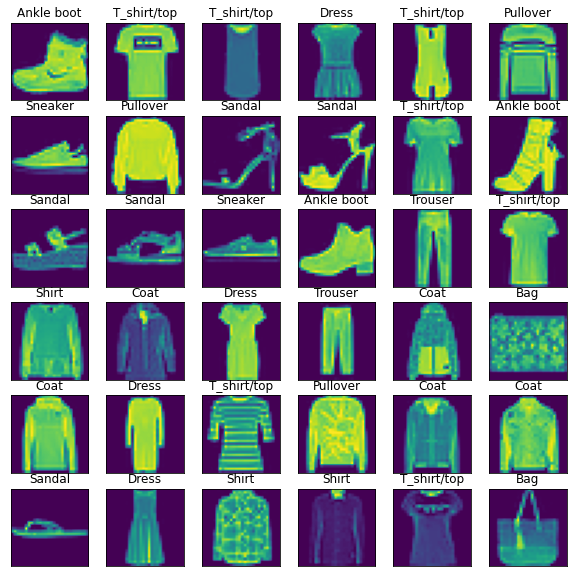

In [0]:
# plt.imshow(X_test[11])#imshow() method from matplotlib
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [0]:
model = tf.keras.models.Sequential()

diff between valid as same for padding:
size of output shoulb be same as input by adding zeroes while striding as we may miss any column and doesnt get max out of some of data.

pool_size,strides,paddingactivation,input_shape are hyper parameters.
for conv2d layer

In [0]:
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size=3,padding = "same",activation ="relu",input_shape = (28,28,1)))

In [0]:
# adding 2nd layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3,padding="same",activation="relu"))
# kernel_size is size of filter i.e 3 by 3 

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))


maxp00l layer:
pool_size,strides,padding are hyper parameters.




In [0]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size = 3,padding="same",activation="relu"))


In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))


In [0]:
# flattening
model.add(tf.keras.layers.Flatten())#keras.ayers is just a module

In [0]:
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
# 128 is no. of hidden neurons im the layer

In [0]:
# output layer::
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [0]:
X_train=X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
model.fit(x=X_train,y=y_train,epochs=10)    

Epoch 1/10
1875/1875 [==============================] - 168s 90ms/step - loss: 0.3795 - accuracy: 0.8641
Epoch 2/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.2361 - accuracy: 0.9141
Epoch 3/10
1875/1875 [==============================] - 170s 91ms/step - loss: 0.1935 - accuracy: 0.9288
Epoch 4/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.1593 - accuracy: 0.9411
Epoch 5/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.1316 - accuracy: 0.9506
Epoch 6/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.1071 - accuracy: 0.9597
Epoch 7/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0869 - accuracy: 0.9681
Epoch 8/10
1875/1875 [==============================] - 170s 90ms/step - loss: 0.0704 - accuracy: 0.9740
Epoch 9/10
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0576 - accuracy: 0.9791
Epoch 10/10
1875/1875 [==============================] 

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [0]:
test_loss,test_accuracy = model.evaluate(X_test,y_test)


313/313 [==============================] - 8s 25ms/step - loss: 0.3445 - accuracy: 0.9238


In [0]:
test_accuracy

0.923799991607666

In [0]:
plt.imshow(X_test[1])